<a href="https://colab.research.google.com/github/Hagar-zakaria/Building-a-Sentiment-Analysis-Model-with-IMDB-Movie-Reviews/blob/main/Text_Classification_with_Recurrent_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project, we will train a recurrent neural network on the IMDB large movie review dataset for sentiment analysis. The IMDB large movie review dataset is a binary classification dataset — all the reviews have either a positive or negative sentiment. For that, we will use TensorFlow datasets.



# Step-by-Step Project Implementation


1. Install and Import Required Libraries


First, install the required libraries (if not already installed):



In [ ]:
!pip install tensorflow-datasets


Then, import the necessary libraries for the project.



In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np


2. Load the IMDB Dataset

We will use TensorFlow Datasets to load the IMDB movie review dataset.



In [ ]:
dataset, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)
train_dataset = dataset['train'].batch(32).shuffle(10000).prefetch(tf.data.AUTOTUNE)
test_dataset = dataset['test'].batch(32).prefetch(tf.data.AUTOTUNE)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.CL1DHN_1.0.0/imdb_reviews-train.tfrecor…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.CL1DHN_1.0.0/imdb_reviews-test.tfrecord…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.CL1DHN_1.0.0/imdb_reviews-unsupervised.…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


We load the dataset into two parts: training and testing. The as_supervised=True flag ensures we get the data in (text, label) format.

- 'imdb_reviews': This specifies the dataset we are loading, which is the IMDB movie reviews dataset. It is a collection of 50,000 movie reviews labeled as either positive or negative.


- as_supervised=True: This flag returns the dataset in a tuple format (input, label). For this dataset, it returns movie reviews as text and their corresponding sentiment as a label (0 for negative, 1 for positive).


- train_dataset, test_dataset = dataset['train'], dataset['test']:

This line splits the dataset into two parts:
1. train_dataset: The training portion of the dataset (25,000 samples).
2. test_dataset: The testing portion of the dataset (25,000 samples).

In [ ]:
info

tfds.core.DatasetInfo(
    name='imdb_reviews',
    full_name='imdb_reviews/plain_text/1.0.0',
    description="""
    Large Movie Review Dataset. This is a dataset for binary sentiment
    classification containing substantially more data than previous benchmark
    datasets. We provide a set of 25,000 highly polar movie reviews for training,
    and 25,000 for testing. There is additional unlabeled data for use as well.
    """,
    config_description="""
    Plain text
    """,
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    data_dir=PosixGPath('/tmp/tmpbzz7hinytfds'),
    file_format=tfrecord,
    download_size=80.23 MiB,
    dataset_size=129.83 MiB,
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
        'text': Text(shape=(), dtype=string),
    }),
    supervised_keys=('text', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=25000, num_shards=1>,
        'train': <SplitInfo

Summary in Simple Words:
- This dataset contains 50,000 IMDB movie reviews for the task of binary sentiment classification (positive or negative).
- 25,000 reviews are for training, and 25,000 are for testing the model.
-There's also an additional 50,000 unlabeled reviews for use in other tasks.
- The dataset is stored in plain text format and is downloaded in TFRecord format.
- The total download size is 80.23 MB, and after extracting, the dataset size is 129.83 MB.
**Each review has two parts:**
1. Text (the review itself).
2. Label (either 0 for negative or 1 for positive).
- It also provides the citation for proper attribution if used in academic work.

**Train_dataset and test_dataset**

In [ ]:
train_dataset, test_dataset = dataset['train'], dataset['test']

is calling the train and test data that is already pre-split in the dataset.

**What the Code Does:**
- dataset['train']: This retrieves the training data (25,000 labeled movie reviews) from the dataset.
- dataset['test']: This retrieves the testing data (another 25,000 labeled movie reviews) from the dataset.

In [ ]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

You’re working with a PrefetchDataset, which helps speed up training by preloading data.
**Each element in the dataset consists of two parts:**
- A text review (string).
- A label (integer, 0 or 1, for negative or positive sentiment).

This dataset is ready to be passed to your machine learning model

In [ ]:
test_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

- The test dataset contains text reviews and labels (positive or negative).
- The data is preloaded in the background for faster processing.
- The test dataset is used to evaluate how well the model performs on new, unseen data (to check if the model learned correctly during training).

**Take one train_dataset and view the text and label**

In [ ]:
for text, label in train_dataset.take(1):
    print('Text: ', text.numpy())
    print('\nLabel: ', label.numpy())
    pass

Text:  b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."

Label:  0


The code is printing one sample from the training dataset.
**The sample includes:**
- Text: A movie review, which is negative in this case.
- Label: 0, meaning the review is classified as negative.

**Create batches of text and label for training dataset**


First we will shuffle the data for training and create batches of text, label pairs.

**Why Batching and Shuffling Matter:**

- Shuffling helps the model learn the real patterns in the data instead of learning based on any specific sequence.
- Batching helps with memory management and makes the training process faster and more efficient.

**Prefetching** is a technique that helps speed up the training process by preparing the next batch of data while the model is working on the current batch.

**Here’s how it works:**

- When the model is training on one set of data (step s), prefetching means that the next set of data (step s+1) is already being loaded in the background.
- This way, when the model finishes its current step, the next batch of data is already ready to go. This reduces any waiting time for loading data, making the process faster.

**How it works in TensorFlow (tf.data):**

- tf.data.Dataset.prefetch is a tool provided by TensorFlow that helps implement prefetching. It loads data in the background while the model trains.

- The AUTOTUNE setting allows TensorFlow to automatically adjust how much data to prefetch based on the system's resources, so the process runs as efficiently as possible.


In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

1. BUFFER_SIZE = 10000:

**What it means:**

- The BUFFER_SIZE controls how much data should be shuffled at once when preparing the data for training.

In this case, 10000 means that 10,000 samples will be shuffled before each training epoch (or iteration).

**Why it’s important:**

- Shuffling the data helps ensure that the model doesn’t learn based on the order of the data (e.g., if all positive reviews come first and all negative ones come last).

A large BUFFER_SIZE like 10000 ensures a good mix of the data before each training step, making the training process more robust.

2. BATCH_SIZE = 64:


**What it means:**

- The BATCH_SIZE determines how many samples the model processes at once before updating its weights.

- In this case, BATCH_SIZE = 64 means that the model will look at 64 reviews and their labels at a time before making adjustments (updating the model’s weights).

In [ ]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

**Training Dataset:**

- The training data is shuffled (to mix the samples).
- Then it is divided into batches of 64.
- Prefetching is used to load the next batch in the background while the model is training on the current batch, which makes training faster.

**Test Dataset:**

- The test data is also divided into batches of 64.
- Prefetching is enabled for the test data, so the model doesn’t have to wait between batches when evaluating performance.

In [ ]:
for text, label in train_dataset.take(1):
    print('texts: ', text.numpy()[:3])
    print('\nlabels: ', label.numpy()[:3])

texts:  [b'After watching this, I had lost a little respect for Christopher Lee (This has passed over time). This film was utter garbage. First, they tried to recreate the ending from the first "Howling," with incredibly bad make-up. Then they try to turn it into a sad excuse of a werewolf porn film! The plot sucks and the whole film is just AWFUL!!!! A brother of a werewolf victim from the first film (From the look of it, it was SUPPOSED to be Dee Wallace Stone)teams up with Lee and another woman to destroy the group of werewolves, lead by Sybil Danning, who seems to be naked all the time.<br /><br />This is not even worth renting (Unless you want to waste your time and money watching the nudity.). Try to catch it on cable instead. It would be so chopped up, it may actually make sense.'
 b"Starlift is a pleasant and interesting throwback to those all star musical pictures that every studio was putting out during the World War II years. When you've got such stars as Gary Cooper, James 

**Output Explanation:**

**Text Reviews:**

You can see three reviews printed as text:

- Review 1: A detailed review of the movie "The Plainsman", explaining the historical inaccuracies of the film.
- Review 2: A negative review of a New Testament adaptation, criticizing the lead actor and the script.
- Review 3: A quirky review of the film "Phil the Alien", where the reviewer initially finds the oddness funny but later loses interest.

**Labels:**

The labels associated with the reviews are [1, 0, 0], meaning:
- Review 1: Label 1 → Positive review.
- Review 2: Label 0 → Negative review.
- Review 3: Label 0 → Negative review.

**Summary:**

- The code takes one batch of data from the training dataset.
- It prints the first three text reviews and their sentiment labels.
- 1 means the review is positive, while 0 means the review is negative.

# **Create the text encoder**


In machine learning, raw text data (like movie reviews) cannot be directly fed into a model because models require numerical input, not words. This is where text preprocessing comes in.



tf.keras.layers.TextVectorization is a layer in TensorFlow that transforms raw text into an encoded representation.

- It breaks the text into tokens (typically words).
- Each word is then mapped to a number.
- The output is a sequence of numbers (integers) that represents the words in the input text.

In [ ]:
VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(max_tokens = VOCAB_SIZE)
encoder

<TextVectorization name=text_vectorization, built=False>

This line sets the vocabulary size to 1000.

- The vocabulary size limits how many unique words or tokens the model will consider from the dataset. In this case, the model will only use the top 1000 most frequent words from the text data.

- Words that are not in the top 1000 will be treated as "unknown."

**Summary**

- VOCAB_SIZE = 1000: Limits the vocabulary to the top 1000 most frequent words.
- encoder = TextVectorization(...): Creates a TextVectorization layer to convert text into numbers.
- **TextVectorization name=text_vectorization, built=False**: Means the layer has been created, but it hasn’t yet been adapted (trained) to the text data.

**The adapt() function**

helps the layer (like TextVectorization) learn from the words in the sentences.

- This layer takes the words and assigns a number to each word (for example, "movie" = 1, "great" = 2).

- After that, every sentence with those words will be converted to numbers instead of words.

- This helps the model train on the numbers that represent the sentences, instead of trying to train on text that it can't understand.

**The Main Idea:**

- The model can't understand text directly; it needs the words to be converted to numbers.
- The adapt() function teaches the TextVectorization layer to map each word to a specific number.
- After this process, any text given to the model will be turned into numbers so the model can train on it.

In [ ]:
encoder.adapt(train_dataset.map(lambda text, label: text))

- train_dataset.map(lambda text, label: text): This extracts only the text (reviews) from the dataset, ignoring the labels.

- encoder.adapt(): This teaches the TextVectorization layer (the encoder) to learn the vocabulary from the text, so it can later convert the words into numbers during training.

In [ ]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'the', 'and', 'a', 'of', 'to', 'is', 'in', 'it', 'i',
       'this', 'that', 'br', 'was', 'as', 'for', 'with', 'movie', 'but'],
      dtype='<U14')

- The TextVectorization layer has learned the top words in the dataset.
- The words are ranked by how frequently they appear in the text data.
- Words like 'the', 'and', 'a' are very common in any English text, so they are at the top

In [ ]:
encoded_text = encoder(text)[:3].numpy()
encoded_text

array([[101, 147,  11, ...,   0,   0,   0],
       [  1,   7,   4, ...,   0,   0,   0],
       [  1,   7, 176, ...,   0,   0,   0]])

This code **encodes text** into a sequence of numbers (indices) based on the vocabulary that the TextVectorization layer (encoder) has learned. It converts the words in the text into their corresponding numeric values.

**Padded Sequences:** 0

- The text is padded with 0s to match the length of the longest sequence in the batch.
- If one sentence is shorter than the others, extra 0s are added at the end to make it the same length as the longest sentence.
- Padding ensures that all the sentences in the batch have the same length, which is required for efficient processing in neural networks.

**Purpose of the below Code:**

- This code shows how text is converted into numbers (using the TextVectorization layer), and then the numbers are converted back to words using the vocabulary that the layer has learned.

- This helps you verify that the encoding and decoding processes are working correctly and that the model is handling text data properly.

In [ ]:
for n in range(3):
    print("Original: ", text[n].numpy())
    print("Round-trip: ", " ".join(vocab[encoded_text[n]]))
    print()

Original:  b'After watching this, I had lost a little respect for Christopher Lee (This has passed over time). This film was utter garbage. First, they tried to recreate the ending from the first "Howling," with incredibly bad make-up. Then they try to turn it into a sad excuse of a werewolf porn film! The plot sucks and the whole film is just AWFUL!!!! A brother of a werewolf victim from the first film (From the look of it, it was SUPPOSED to be Dee Wallace Stone)teams up with Lee and another woman to destroy the group of werewolves, lead by Sybil Danning, who seems to be naked all the time.<br /><br />This is not even worth renting (Unless you want to waste your time and money watching the nudity.). Try to catch it on cable instead. It would be so chopped up, it may actually make sense.'
Round-trip:  after watching this i had lost a little [UNK] for [UNK] lee this has [UNK] over time this film was [UNK] [UNK] first they tried to [UNK] the ending from the first [UNK] with incredibly b

**Example 1:**

- Original Text:
The review talks about a movie called Slaughter High and its revenge story, mentioning that the movie was a mess and ended poorly.

- Round-trip Text:
Many words like "Slaughter", "revenge", "nerdy", "coldest" were not in the top 1000 words, so they were replaced with [UNK].

The rest of the words like "the", "of", "to", "movie", etc., were retained as they were in the vocabulary.

**Example 2:**

- Original Text:
A review that praises a movie for holding up well over time, particularly noting its 80s vibe and comedy.

- Round-trip Text:
Words like "recently", "memory", "Keaton", "Howard" were replaced with [UNK] because they were not part of the top 1000 words in the vocabulary.

Common words like "this", "is", "film", "great", "when", "we", "were", etc., are retained because they are common and were included in the vocabulary.

**Example 3:**

- Original Text:
This review describes a strange and funny movie, highlighting its unique style and quirky characters.

- Round-trip Text:
Words like "dreamy", "bleached", "spacey", and "goofy" were replaced with [UNK] because they weren’t in the top 1000 words.

More common words like "this", "movie", "was", "very", "funny", "all", "of", "actors", and "real" were retained since they were part of the vocabulary.


**In summary**

- Original text: The raw movie reviews.
- Round-trip text: The reviews after encoding and decoding, where some words were replaced by [UNK] because they weren’t frequent enough in the dataset.
- The model successfully retained common words, but rare or unique words were replaced with [UNK].

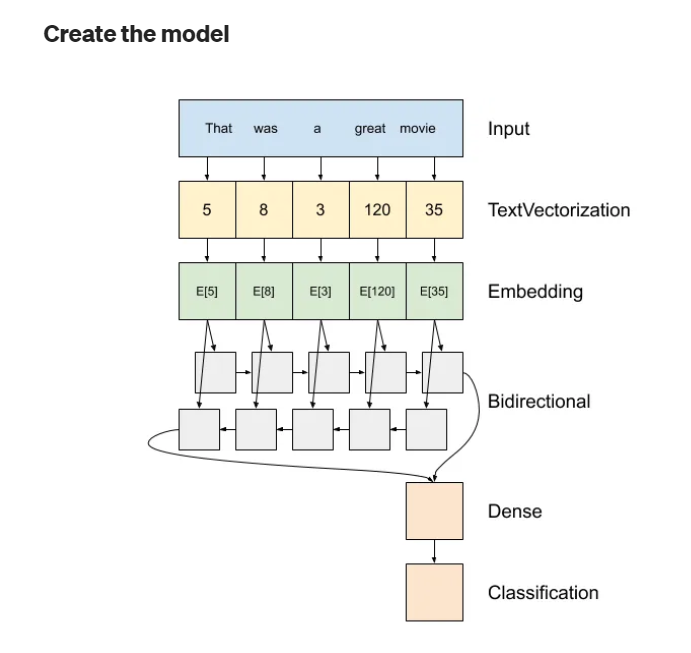

# Neural Network Model for Text Classification

This diagram represents a neural network model that processes text data and makes predictions (in this case, likely for text classification). Let’s break it down step by step.

## 1. The Model is Built as a Sequential Model:
The model is built using `tf.keras.Sequential`, meaning the layers are stacked one after the other in sequence.

## 2. Text Vectorization (Encoder Layer):
The first layer in the model is the `TextVectorization` layer (encoder).  
This layer converts the raw text (like "That was a great movie") into a sequence of numbers (tokens). Each word in the sentence is replaced by a number based on a learned vocabulary. For example:

- "That" → 5  
- "was" → 8  
- "a" → 3  
- "great" → 120  
- "movie" → 35

## 3. Embedding Layer:
After the text is turned into numbers, the Embedding layer comes next.  
This layer converts each number (token) into a dense vector (a set of numbers). Each word is represented as a vector of numbers instead of just a single number.

For example:  
- "That" (which was 5) → `E[5]` (a vector like `[0.1, 0.4, 0.7, …]`)  
- "was" (which was 8) → `E[8]` (a different vector)  

These vectors are trainable, meaning the model adjusts them during training to learn better representations of words.

### 3.1 Masking:
Masking is used to ignore padding (extra zeros added to sentences to make them the same length).  
There are three ways to introduce masking:

- **Masking Layer**: Add a masking layer manually.
- **`mask_zero=True`**: Set this in the Embedding layer to automatically handle padding.
- **Manual Masking**: Pass the mask when calling layers that support it (like RNN layers).

## 4. Bidirectional RNN Layer:
Next, the model includes a Bidirectional LSTM layer (a type of Recurrent Neural Network).  
Recurrent Neural Networks (RNNs) process data in sequences (like text) by iterating through one word at a time, passing information from one word to the next.  
Bidirectional means the LSTM processes the sequence in both directions:
- **Forward**: From the beginning of the sentence to the end.
- **Backward**: From the end of the sentence to the beginning.  
This helps capture context from both directions (what came before and after each word).

### 4.1 Advantage of Bidirectional RNN:
The advantage of a bidirectional RNN is that it can capture information from both the start and the end of a sentence, which helps understand the full context.

### 4.2 Disadvantage of Bidirectional RNN:
The disadvantage is that it’s harder to use for streaming predictions (like predicting one word at a time) because it processes the whole sentence in both directions.

## 5. Dense Layer and Output Layer (Classification):
After processing the text with the Bidirectional RNN, the model uses Dense layers to further process the output.  
Finally, the model produces a single output for classification (for example, deciding whether the sentence is positive or negative in sentiment).

## Summary of the Layers in the Model:
- **Text Vectorization**: Converts text into numbers (tokens).
- **Embedding Layer**: Converts those numbers into dense vectors.
- **Bidirectional LSTM**: Processes the sentence in both forward and backward directions.
- **Dense Layer**: Processes the information from the LSTM.
- **Output Layer (Classification)**: Produces the final classification result.


In [ ]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim = len(encoder.get_vocabulary()),
        output_dim = 64,
        mask_zero = True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [ ]:
print([layer.supports_masking for layer in model.layers])


[False, True, True, True, True]


Make sure that is no padding needed to be masked

This means the model has 5 layers, and the list shows whether each layer supports masking:

- False: The first layer (TextVectorization/encoder) does not support masking.
- True: The second layer (Embedding) supports masking. This is because the Embedding layer can ignore padding (e.g., zeros used to make sequences of equal length) when mask_zero=True is set.
- True: The third layer (Bidirectional LSTM) supports masking, as LSTM layers can handle masked sequences to avoid processing padding.
- True: The next layer (Dense) supports masking.
- True: The final layer (Dense output layer) also supports masking.

**Predict on a sample text without padding**

In [ ]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)


In [ ]:
import numpy as np
import tensorflow as tf

# Assuming 'model' and 'encoder' (TextVectorization layer) are already defined and trained

# Sample text to predict
sample_text = "The movie was cool. The animation and the graphics were out of this world. I would recommend this movie."

# Step 1: Ensure the text is passed in the correct format (as a batch)
sample_text_batch = np.array([sample_text], dtype=object)  # Set dtype explicitly to object (string)

# Step 2: Make predictions using the model (let the TextVectorization layer handle the tokenization)
predictions = model.predict(sample_text_batch)

# Step 3: Output the prediction result
print(predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
[[-0.00468088]]


Predict on a sample text with padding

In [ ]:
import numpy as np
import tensorflow as tf

# Assuming 'model' and 'encoder' (TextVectorization layer) are already defined and trained

# Sample text to predict
sample_text = "The movie was cool. The animation and the graphics were out of this world. I would recommend this movie."

# Add padding: Repeating "the " 2000 times to create padding
padding = "the " * 2000

# Step 1: Ensure both the sample text and padded text are passed in the correct format
sample_text_batch = np.array([sample_text, padding], dtype=object)  # Set dtype explicitly to object (string)

# Step 2: Make predictions using the model (let the TextVectorization layer handle the tokenization)
predictions = model.predict(sample_text_batch)

# Step 3: Output the prediction result for the original text
print("Prediction for sample text:", predictions[0])

# Optional: Output the prediction result for the padded text
print("Prediction for padded text:", predictions[1])


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Prediction for sample text: [-0.00468088]
Prediction for padded text: [-0.00713129]


**Compile the model**


In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.Adam(1e-4),
              metrics = ['accuracy'])

 1. **Loss Function**:
- tf.keras.losses.BinaryCrossentropy(from_logits=True)
- Binary Crossentropy: This is the loss function used when solving binary classification problems, where the goal is to classify each input into one of two possible classes (like True/False, Yes/No, etc.).
- It calculates the difference between the true label and the predicted label by comparing the probability distribution of the true labels and predicted labels.

**from_logits=True:** This argument means that the output of the model is in the form of logits, i.e., raw predictions that haven't been passed through an activation function like sigmoid.

- If you use from_logits=True, it tells the model to apply the sigmoid activation function internally before calculating the loss.

- If your model’s output is raw (not yet squashed to a probability between 0 and 1), you should set from_logits=True. Otherwise, set it to False if you already applied the sigmoid activation function.

2. **Adam Optimizer:** Adam (Adaptive Moment Estimation) is one of the most popular and efficient optimizers used in deep learning

**Learning Rate 1e-4:** The 1e-4 stands for
1
×
1
0
−
4
1×10
−4
 , or 0.0001, which is the learning rate for the Adam optimizer.


**A learning rate**
controls how much to adjust the model in response to the estimated error after each update. A smaller learning rate (like 1e-4) makes the learning slower and more stable, while larger values can make it faster but risk overshooting the optimal solution.

3. **Metrics:** ['accuracy']
Accuracy: This is the metric that will be used to evaluate how well the model is performing. Accuracy measures the percentage of predictions the model got right.
It’s calculated as:
Accuracy
=
Number of correct predictions
Total number of predictions
Accuracy=
Total number of predictions
Number of correct predictions
​

In binary classification, accuracy is a common evaluation metric, especially when the dataset is balanced.

**Train the model**

In [ ]:
# عرض شكل المدخلات والمخرجات للتأكد
for x, y in train_dataset.take(1):
    print(f"Input Shape: {x.shape}, Target Shape: {y.shape}")

Input Shape: (64,), Target Shape: (64,)


In [ ]:
history = model.fit(
    train_dataset,  # Training data
    epochs=10,      # Number of epochs to train the model
    validation_data=test_dataset  # Validation data to evaluate during training
)


Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 815s 2s/step - accuracy: 0.5137 - loss: 0.6838 - val_accuracy: 0.7614 - val_loss: 0.4675
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 861s 2s/step - accuracy: 0.7657 - loss: 0.4634 - val_accuracy: 0.8372 - val_loss: 0.4008
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 857s 2s/step - accuracy: 0.8317 - loss: 0.3791 - val_accuracy: 0.8522 - val_loss: 0.3568
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 869s 2s/step - accuracy: 0.8477 - loss: 0.3425 - val_accuracy: 0.8337 - val_loss: 0.3430
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 855s 2s/step - accuracy: 0.8589 - loss: 0.3249 - val_accuracy: 0.8492 - val_loss: 0.3691
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 860s 2s/step - accuracy: 0.8624 - loss: 0.3201 - val_accuracy: 0.8548 - val_loss: 0.3173
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 803s 2s/step - accuracy: 0.8676 - loss: 0.3058 - val_accuracy: 0.8509 - val_loss: 0.3196
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 917s 2s/step - accuracy: 0.8677 - loss: 0.3064 - val_accu

**Evaluate the model**

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

391/391 ━━━━━━━━━━━━━━━━━━━━ 143s 367ms/step - accuracy: 0.8589 - loss: 0.3134
Test Loss: 0.31345438957214355
Test Accuracy: 0.858680009841919


**Plot the accuracy and loss**

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])
    pass

(0.0, 0.6613481402397156)

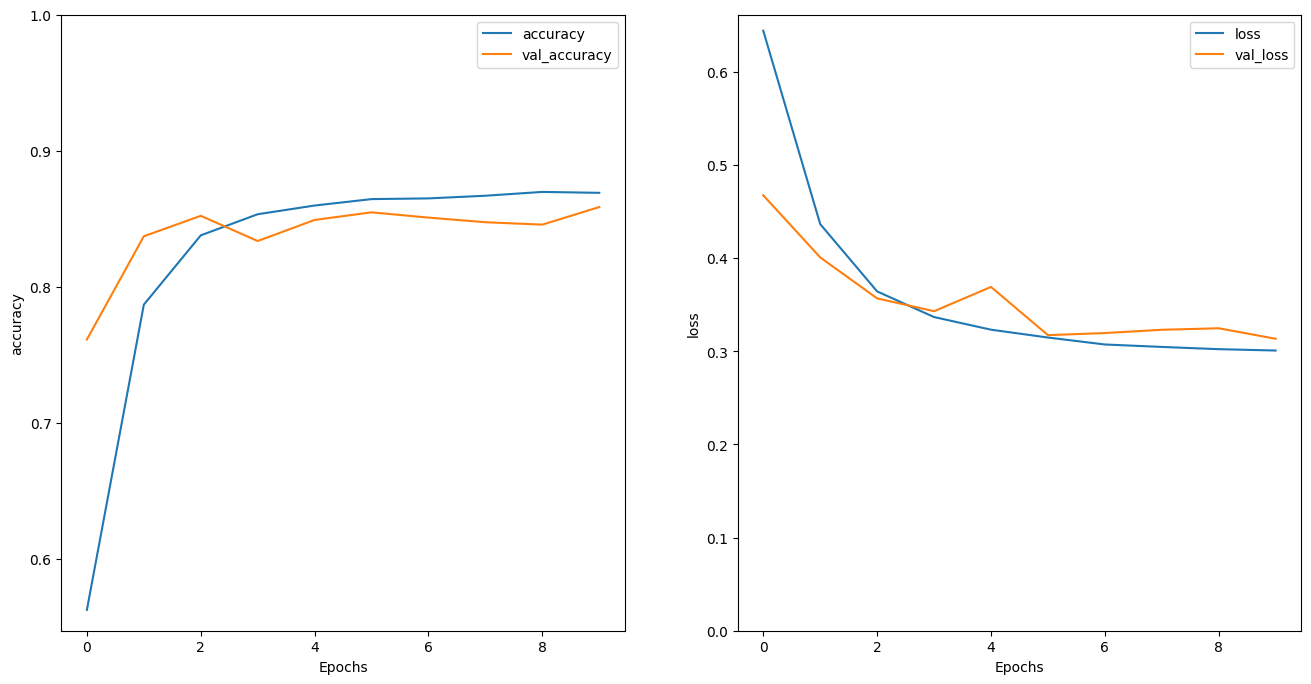

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)

plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

**Predict the sample_text**

If the prediction is >= 0.0, it is positive else it is negative.


In [ ]:
import numpy as np

# Sample text to predict
sample_text = "The movie was cool. The animation and the graphics were out of this world. I would recommend this movie."

# Ensure the text is passed as a batch and set dtype explicitly to object (string)
sample_text_batch = np.array([sample_text], dtype=object)

# Make predictions using the model
predictions = model.predict(sample_text_batch)

# Output the prediction result
print(predictions)

# If the prediction is >= 0, it is positive else it is negative
if predictions[0] >= 0:
    print("Positive Review")
else:
    print("Negative Review")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step
[[0.6804362]]
Positive Review


In [ ]:
import numpy as np

# Sample text to predict
sample_text = "The movie was very bad, total waste of money. I will never recommend this movie."

# Ensure the text is passed as a batch and set dtype explicitly to object (string)
sample_text_batch = np.array([sample_text], dtype=object)

# Make predictions using the model
predictions = model.predict(sample_text_batch)

# Output the prediction result
print(predictions)

# If the prediction is >= 0, it is positive else it is negative
if predictions[0] >= 0:
    print("Positive Review")
else:
    print("Negative Review")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[-3.7958815]]
Negative Review


## The left graph (Accuracy):

- The **blue line** represents the accuracy on the training data (how well the model predicts during training).
- The **orange line** represents the accuracy on the test data (how well the model predicts on unseen data).

### Observations:
- At first, the accuracy on the training data improves a lot (the blue line), and as the model continues to train through more *Epochs* (training rounds), the accuracy increases and becomes stable.
- The accuracy on the test data (the orange line) also improves and stabilizes, though it’s slightly lower than the accuracy on the training data.

### Conclusion:
The model is working well because there’s a good balance between how it performs on both training and test data.

---

## The right graph (Loss):

- The **blue line** represents the loss on the training data (how much the model’s predictions differ from the actual results).
- The **orange line** represents the loss on the test data.

### Observations:
- At the beginning, the loss is very high, but as the model trains through more *Epochs*, the loss decreases significantly and stabilizes after about 3 Epochs.
- The blue and orange lines are very close, meaning the model isn’t overfitting (learning too much from the training data only).

### Conclusion:
- The accuracy improves and becomes stable on both training and test data.
- The loss decreases a lot and becomes stable, meaning the model is learning well and making correct predictions.
- Overall performance is great and balanced, with no big difference between training and test data, which means the model isn’t overfitting.
